<a href="https://colab.research.google.com/github/HashtaG2000/ATA/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

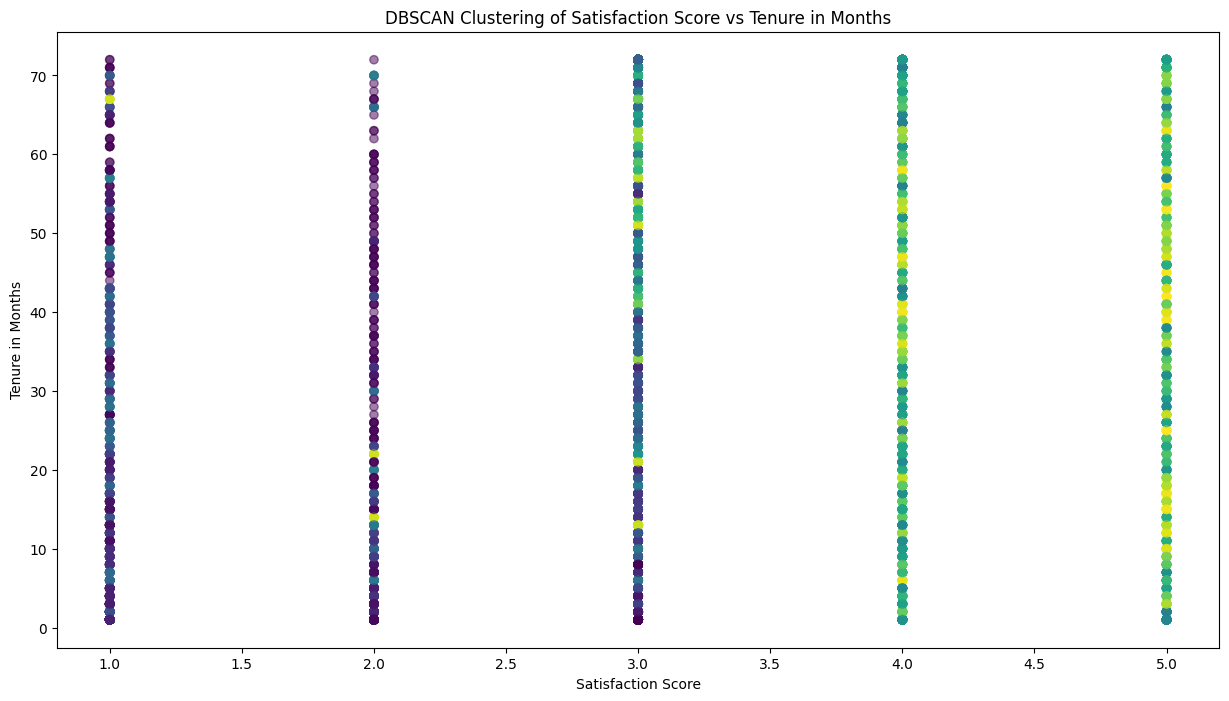

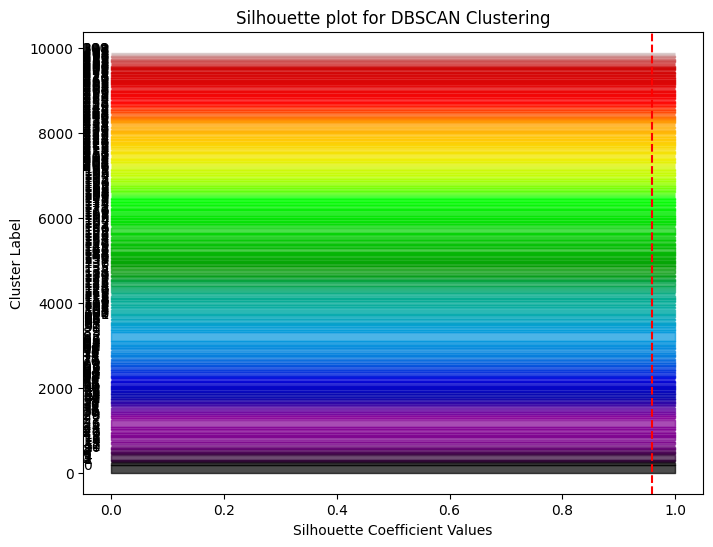

Silhouette Score (DBSCAN): 0.9595192445093883
Davies-Bouldin Index (DBSCAN): 0.4277596517347767
Calinski-Harabasz Index (DBSCAN): 4378.935283729717


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

# Load your dataset
data = pd.read_csv("/content/Telco.csv")

# Select relevant columns for clustering
X = data[['Satisfaction Score', 'Tenure in Months']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the DBSCAN parameters
epsilon = 0.04  # maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5
# Initialize DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN to the data
dbscan.fit(X_scaled)

# Get cluster labels
labels_dbscan = dbscan.labels_

# Calculate evaluation metrics
silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
db_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)
ch_dbscan = calinski_harabasz_score(X_scaled, labels_dbscan)

# Add cluster labels to the original dataframe
data['Cluster (DBSCAN)'] = labels_dbscan

# Visualize the clustering
plt.figure(figsize=(15,8))
plt.scatter(data['Satisfaction Score'], data['Tenure in Months'], c=labels_dbscan, cmap='viridis', alpha=0.5)
plt.xlabel('Satisfaction Score')
plt.ylabel('Tenure in Months')
plt.title('DBSCAN Clustering of Satisfaction Score vs Tenure in Months')
plt.show()

# Plot silhouette plot
plt.figure(figsize=(8, 6))
silhouette_values = silhouette_samples(X_scaled, labels_dbscan)
silhouette_avg = silhouette_score(X_scaled, labels_dbscan)
y_lower = 10
for i in range(len(set(labels_dbscan))):
    ith_cluster_silhouette_values = silhouette_values[labels_dbscan == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / len(set(labels_dbscan)))
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette plot for DBSCAN Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.show()

# Print evaluation metrics
print("Silhouette Score (DBSCAN):", silhouette_dbscan)
print("Davies-Bouldin Index (DBSCAN):", db_dbscan)
print("Calinski-Harabasz Index (DBSCAN):", ch_dbscan)
